<a href="https://colab.research.google.com/github/d4rk3dge/test_demo/blob/master/Deep_Learning_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd,seaborn as sns, numpy as np, matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images = train_images.reshape(train_images.shape[0], 28, 28 , 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28 , 1)

In [8]:
model = keras.Sequential([
    #keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 67s 35ms/step - loss: 0.4565 - accuracy: 0.8333
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3057 - accuracy: 0.8888
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2587 - accuracy: 0.9050
Epoch 4/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2256 - accuracy: 0.9165
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2008 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1772 - accuracy: 0.9346
Epoch 7/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1589 - accuracy: 0.9410
Epoch 8/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1392 - accuracy: 0.9482
Epoch 9/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1245 - accuracy: 0.9531
Epoch 10/10
1875/1875 [==============================] - 63s 33m

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.2936 - accuracy: 0.9088
Test accuracy: 0.9088000059127808


In [12]:
predictions = model.predict(test_images)

313/313 [==============================] - 5s 14ms/step


1/1 [==============================] - 0s 61ms/step


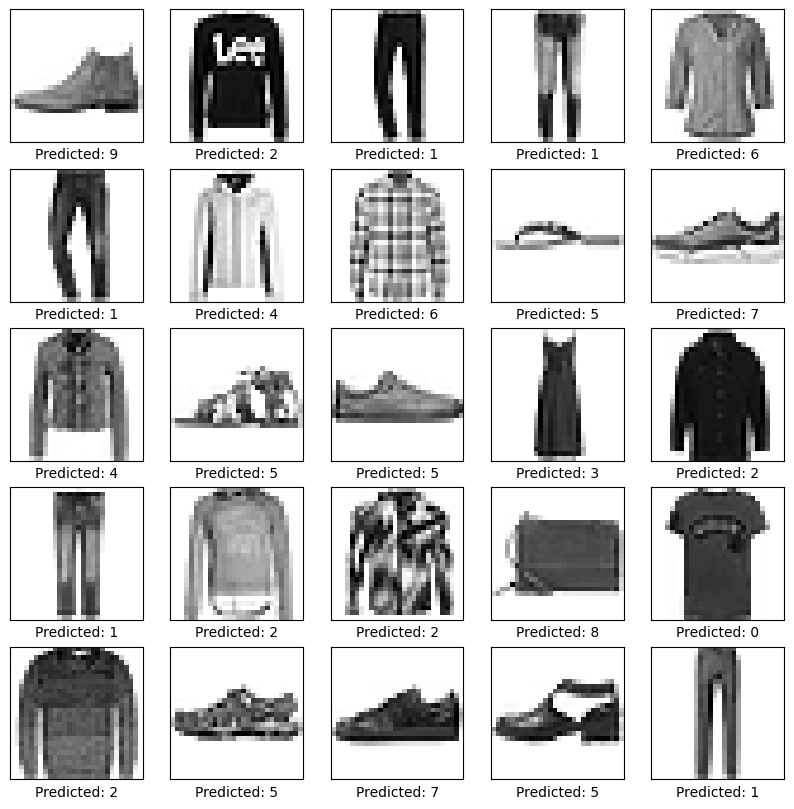

In [13]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    # Make predictions on test images
    predictions = model.predict(test_images[i].reshape(1, 28, 28, 1))
    predicted_label = tf.argmax(predictions, axis=1).numpy()[0]

    # Display the predicted label
    plt.xlabel(f'Predicted: {predicted_label}')

plt.show()



In [14]:
print(predictions)

[[7.2788064e-10 1.0000000e+00 2.8678149e-12 6.2309902e-10 8.2399522e-13
  3.2756683e-18 1.5177722e-12 1.4733761e-18 5.4667607e-12 1.3349184e-18]]


ValueError: ignored

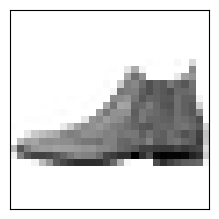

In [17]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Load the MobileNetV2 model pre-trained on ImageNet
model = keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Display and predict a batch of test images
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    # Predict the class labels for the images
    predictions = model.predict(test_images[i].reshape(1, 224, 224, 3))
    predicted_label = keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0][0][1]
    plt.xlabel(predicted_label)

plt.show()

In [18]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data
test_images = test_images / 255.0
test_images_resized = []

# Resize the test images to the required input size (224x224x3)
for img in test_images:
    img = img_to_array(load_img(img, target_size=(224, 224)))
    img = img / 255.0  # Normalize pixel values
    test_images_resized.append(img)

test_images_resized = np.array(test_images_resized)

# Load the MobileNetV2 model pre-trained on ImageNet
model = keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Display and predict a batch of test images
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)

    # Predict the class labels for the images
    predictions = model.predict(np.expand_dims(test_images_resized[i], axis=0))
    predicted_label = keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0][0][1]
    plt.xlabel(predicted_label)

plt.show()

TypeError: ignored

error: ignored

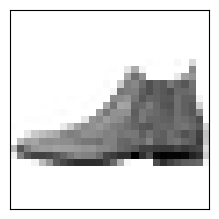

In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data
test_images = test_images / 255.0

# Load the MobileNetV2 model pre-trained on ImageNet
model = keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Display and predict a batch of test images
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    # Resize the image to the required input size (224x224x3) and normalize
    resized_image = cv2.resize(test_images[i], (224, 224))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
    resized_image = resized_image / 255.0

    # Predict the class labels for the resized image
    predictions = model.predict(np.expand_dims(resized_image, axis=0))
    predicted_label = keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0][0][1]
    plt.xlabel(predicted_label)

plt.show()

error: ignored

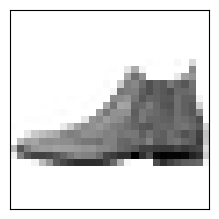

In [20]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# Preprocess the data
test_images = test_images / 255.0

# Load the MobileNetV2 model pre-trained on ImageNet
model = keras.applications.MobileNetV2(weights='imagenet', include_top=True)

# Display and predict a batch of test images
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)

    # Resize the image to the required input size (224x224x3) and normalize
    resized_image = cv2.resize(test_images[i], (224, 224))
    resized_image = cv2.cvtColor(resized_image, cv2.COLOR_GRAY2RGB)
    resized_image = resized_image / 255.0

    # Predict the class labels for the resized image
    predictions = model.predict(np.expand_dims(resized_image, axis=0))
    predicted_label = keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)[0][0][1]
    plt.xlabel(predicted_label)

plt.show()